> #### ***Submitted by: Malaika Ahmed***
# 🔴 ***Task 30: Some preprocessing Using scikit-learn***

Preprocessing is a crucial step in preparing your data for machine learning models. Using scikit-learn, you can scale features with StandardScaler, encode categorical variables with OneHotEncoder, and impute missing values with SimpleImputer. For example, numerical features can be standardized to have zero mean and unit variance, while categorical features can be converted into binary variables. Once preprocessing is complete, you can apply various machine learning models from sklearn like Linear Regression, Logistic Regression, and Random Forest. To optimize these models, perform hyperparameter tuning using techniques such as Grid Search and Random Search. Apply these models to your datasets and note down the results based on the techniques you applied to evaluate their performance. 



***

 # <span style='color:Red'>  ***Data Preprocessing Using Sklearn*** </span>

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.


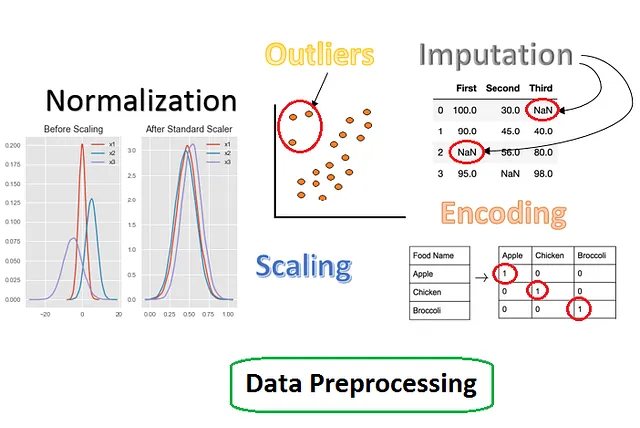

## ***What is Preprocessing?***

 - Preprocessing involves the cleaning, transforming, and organizing of raw data to make it suitable for machine learning algorithms. Raw data is rarely in a pristine state, and preprocessing is the crucial step that bridges the gap between raw information and actionable insights.

- It is the process of identifying incorrect data and fixing the errors so the final dataset is ready to be used. Errors could include duplicate fields, incorrect formatting, incomplete fields, irrelevant or inaccurate data, and corrupted data.

## ***Key steps of Preprocessing in sklearn***

1. ***Handling Missing Data:*** Dealing with missing data is a common challenge in real-world datasets. Preprocessing techniques such as imputation or removal of incomplete records ensure that the model is fed with complete and reliable information. The data we get is rarely homogeneous. Data can be missing due to various reasons and needs to be handled so that it does not reduce the performance of our machine learning model. We can replace the missing data by the Mean or Median of the entire column. We use the Imputer class of sklearn. preprocessing for this task.

2. ***Data imbalanced problem:*** An imbalance occurs when one or more classes have very low proportions/probability in the training data as compared to the other classes.

3. ***Data Cleaning:*** Identifying and correcting mistakes or errors in the data.
   
4. ***Dealing with Outliers***: Outliers, anomalies that deviate significantly from the norm, can distort the learning process. Preprocessing methods like scaling or transformation help mitigate the impact of outliers on model performance
   
5. ***Encoding Categorical Data:*** Machine learning algorithms typically work with numerical data, and categorical variables need to be encoded appropriately. Techniques such as one-hot encoding convert categorical variables into a format that models can understand. Data Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set. Example values such as “Yes” and “No” cannot be used in mathematical equations of the model so we need to encode these variables into numbers. To achieve this we import LabelEncoder class from sklearn.preprocessing library.
   
6. ***Feature Engineering:*** Creating new features or modifying existing ones can enhance the model’s ability to extract meaningful patterns from the data. Feature engineering is a preprocessing step that involves selecting, combining, or transforming features to improve model performance. Identifying those input variables that are most relevant to the task.
    
7.  ***Dimensionality Reduction:*** Creating compact projections of the data.

8. ***Normalization and Standardization***: Ensuring that all features are on a consistent scale is crucial. Normalization and standardization techniques transform data into a common scale, preventing certain features from dominating the learning process due to their magnitude.Most of the machine learning algorithms use the Euclidean distance between two data points in their computations, features highly varying in magnitudes. units and range pose problems. High magnitudes features will weigh more in the distance calculations than features with low magnitudes. Done by Feature standardization or Z-score normalization. StandardScalar of sklearn. preprocessing is imported

***

 # <span style='color:Red'>  ***Setting Up Data*** </span>


In [353]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer

In [259]:
df=pd.read_csv("titanic.csv")

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [261]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [262]:
df.isnull().sum().sum()

869

In [263]:
sns.set()

<Axes: title={'center': 'Missing Values in %'}, ylabel='Percentage'>

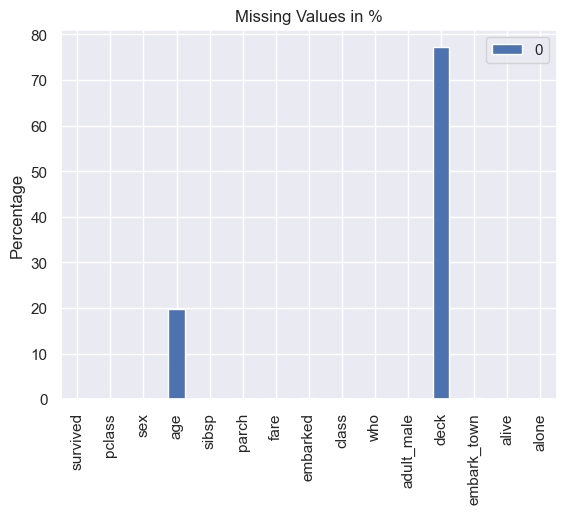

In [264]:
mv=pd.DataFrame((df.isnull().sum()/len(df))*100)
mv.plot(kind='bar',title="Missing Values in %",ylabel='Percentage')

### ***NOTE:***

***We cant just drop the missing values since they are quite large in number 869.We will use SimpleImputer to fill these missing values with mean (in case of numerical columns) and most frequent in case of categorical columns***

***

# <span style='color:Blue'>  ***1. Handling Missing Values (Imputation)***  </span>

- To identify missing values in a dataset and replace them with a numeric value. This is called data imputing, or missing data imputation.

- A simple and popular approach to data imputation involves using statistical methods to estimate a value for a column from those values that are present, then replace all missing values in the column with the calculated statistic.

- It is simple because statistics are fast to calculate and it is popular because it often proves very effective.

- Common statistics calculated include:

    - The column mean value.
    - The column median value.
    - The column mode value.
    - A constant value.

## ***Imputing missing values in column "age"***

In [266]:
print("Number of null values in age column before imputing",df.age.isnull().sum())

Number of null values in age column before imputing 177


In [267]:
imp=SimpleImputer(strategy='mean')

In [268]:
  df['age']=imp.fit_transform(df[['age']])

In [269]:
print("Number of null values in age column afer imputing",df.age.isnull().sum())

Number of null values in age column afer imputing 0


In [270]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## ***Imputing missing values in column "deck"***

In [271]:
print("Number of null values in deck column before imputing",df.deck.isnull().sum())

Number of null values in deck column before imputing 688


In [272]:
Imp=SimpleImputer(strategy='most_frequent')

In [273]:
df['deck'] = Imp.fit_transform(df[['deck']]).ravel()


In [274]:
print("Number of null values in deck column afer imputing",df.deck.isnull().sum())

Number of null values in deck column afer imputing 0


In [275]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [276]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


## ***Imputing missing values in column "embark_town"***

In [277]:
print("Number of null values in embark_town  column before imputing",df.embark_town.isnull().sum())

Number of null values in embark_town  column before imputing 2


In [278]:
Imp=SimpleImputer(strategy='most_frequent')

In [279]:
df['embark_town'] = Imp.fit_transform(df[['embark_town']]).ravel()


In [280]:
print("Number of null values in embark_town column afer imputing",df.embark_town.isnull().sum())

Number of null values in embark_town column afer imputing 0


In [281]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## ***Imputing missing values in column "embarked"***

In [282]:
print("Number of null values in embarked column before imputing",df.embarked.isnull().sum())

Number of null values in embarked column before imputing 2


In [283]:
Imp=SimpleImputer(strategy='most_frequent')

In [284]:
df['embarked'] = Imp.fit_transform(df[['embarked']]).ravel()


In [285]:
print("Number of null values in embark_town column afer imputing",df.embark_town.isnull().sum())

Number of null values in embark_town column afer imputing 0


In [286]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

***

***

***

# <span style='color:Blue'>  ***2. Feature Engineering***  </span>

Feature engineering is the process of using domain knowledge to select, modify, or create new features (variables) that make machine learning algorithms work better. It is one of the most critical steps in building effective machine-learning models because it directly influences the model's ability to learn and make accurate predictions.
model.


## ***Key steps in feature engineering include:***

1. Feature Selection: Identifying the most relevant features that contribute to the model's accuracy.
2. Feature Transformation: Applying mathematical transformations to features to improve the model's performance.
3. Feature Creation: Creating new features from existing data to provide more information to the model.


***

## ***Implementing Feature Engineering***

In [287]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [288]:
# Creating a new column family by summing sibsp and parch:


df['family']=df['sibsp'] + df['parch']


In [289]:
# Finding rows where the 'family' column is greater than 0
condition = df['family'] > 0

# Setting 'travelled_alone' to 0 for those rows
df.loc[condition, 'travelled_alone'] = 0

In [290]:
# Finding the cells in column where value is zero,Setting travelled_alone to 1 for passengers with family.


condition = df['family'] == 0
df.loc[condition, 'travelled_alone'] = 1

<Axes: title={'center': 'Passenger travelled alone?'}, xlabel='travelled_alone'>

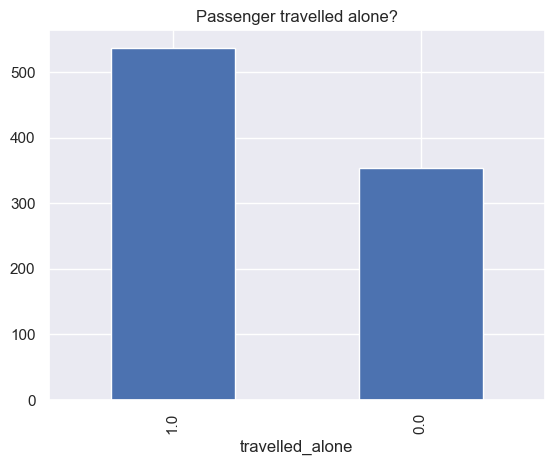

In [291]:

# Count occurrences (1 or 0) of each value in the 'travelled_alone' column
counts = df['travelled_alone'].value_counts()

# Create a bar plot with the counts and a title
counts.plot(title='Passenger travelled alone?', kind='bar')

***

***

***

# <span style='color:Blue'>  ***3. Encoding***  </span>

Some of the widely used data encoding methods are Label Encoding and One Hot Encoding. Let us go through these methods with brief explanations and Python examples.

### ***a) Label Encoding***

Label encoding is basically a way of encoding categorical variables to numerical variables. For example, let’s consider a basket that contains fruits


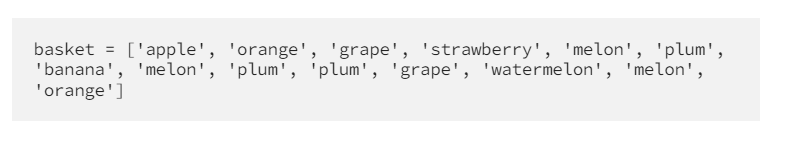


There are eight unique fruits — apple, orange, grape, strawberry, melon, plum, banana and watermelon, and some of them are contained more than once in the basket. Now when we convert these categorical data to numeric form using skleran.preprocessing.LabelEncoder function, the output will be like this 



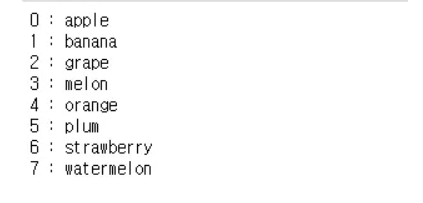

### ***b) One-Hot Encoding***

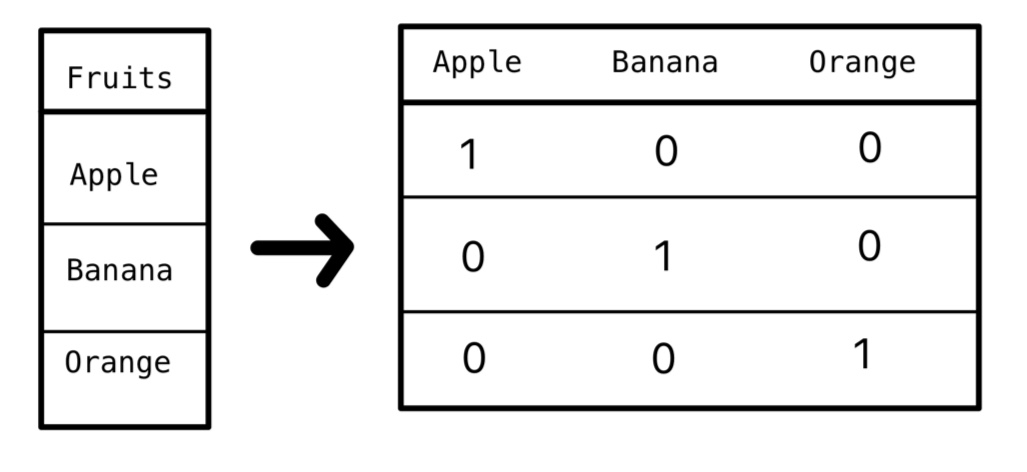




In the diagram above, on the left is original dataset and on the right is the one-hot encoded dataset. As seen, in the one-hot encoded dataset, new features(or columns) are added for each categorical variable, and binary value (0 or 1) was assigned in the column depending on the value. For example, in the first row, there is only ‘Apple’ and this is why 0 was assigned for ‘Banana’ and ‘Orange’ columns in the one-hot encoded dataset while 1 was assigned for ‘Apple’.


***

# ***Implementing Feature Encoding***

In [292]:
from sklearn.preprocessing import OneHotEncoder

In [293]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,travelled_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,1,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0,1.0


In [294]:
df[['female','male']]=OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']]

,sex,female,male
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0
...,...,...,...
886,male,0.0,1.0
887,female,1.0,0.0
888,female,1.0,0.0
889,male,0.0,1.0


In [295]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,travelled_alone,female,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,1,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0.0,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0,1.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0,1.0,0.0,1.0


In [296]:
df['sex']=OneHotEncoder().fit_transform(df[['sex']]).toarray()[:,:]

In [297]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,travelled_alone,female,male
0,0,3,0.0,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,1,0.0,0.0,1.0
1,1,1,1.0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0.0,1.0,0.0
2,1,3,1.0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0,1.0,1.0,0.0
3,1,1,1.0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0.0,1.0,0.0
4,0,3,0.0,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0,1.0,0.0,1.0


In [298]:
# Encoding all categorical columns

In [299]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Select categorical columns
categorical_cols = ['sex', 'embarked', 'deck', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone', 'travelled_alone']

# Apply One-Hot Encoding
encoded_cats = encoder.fit_transform(df[categorical_cols])

# Convert encoded categorical data to DataFrame
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))


C:\Users\Malaika ahmad\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***

# <span style='color:Blue'>  ***4. Feature Scaling***  </span>
Feature scaling is a method to ‘normalize’ variables or features of data. Feature scaling may be necessary in machine learning for several reasons. It can make the training faster, and it is also capable of making the flow of gradient descent smooth.

### ***(a) StandardScaler***
StandardScaler() in Scikit-Learn scales the values so that their mean is 0 and variance is 1 — Gaussian distribution. It is very important to convert dataset so that it follows the Gaussian distribution in some ML algorithms

### ***(b) MinMaxScaler***
MinMaxScaler() is one method of scaling data, and it converts data into some value in the range [0, 1], or else in the rnage [-1, 1],if there are negative values..



***

 # ***Implementing Standard Scaling***

In [300]:
from sklearn.preprocessing import StandardScaler

In [301]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

In [302]:
num_cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'family',
       'travelled_alone', 'female', 'male'],
      dtype='object')

In [303]:
SS=StandardScaler()

In [304]:
df[num_cols]=SS.fit_transform(df[num_cols])


In [305]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,travelled_alone,female,male
0,-0.789272,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,S,Third,man,True,C,Southampton,no,False,0.059160,-1.231645,-0.737695,0.737695
1,1.266990,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,C,First,woman,False,C,Cherbourg,yes,False,0.059160,-1.231645,1.355574,-1.355574
2,1.266990,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,S,Third,woman,False,C,Southampton,yes,True,-0.560975,0.811922,1.355574,-1.355574
3,1.266990,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,S,First,woman,False,C,Southampton,yes,False,0.059160,-1.231645,1.355574,-1.355574
4,-0.789272,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,S,Third,man,True,C,Southampton,no,True,-0.560975,0.811922,-0.737695,0.737695


In [306]:
ScaledCols=num_cols

In [307]:
df[num_cols].describe()

,survived,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,male
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,3.987333e-17,-8.772133e-17,3.987333e-17,2.232906e-16,4.386066e-17,5.382900e-17,3.987333e-18,-3.987333e-18,-6.379733e-17,3.987333e-17,-1.156327e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-1.566107e+00,-7.376951e-01,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.609748e-01,-1.231645e+00,-7.376951e-01,-1.355574e+00
25%,-7.892723e-01,-3.693648e-01,-7.376951e-01,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.609748e-01,-1.231645e+00,-7.376951e-01,-1.355574e+00
50%,-7.892723e-01,8.273772e-01,-7.376951e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.609748e-01,8.119223e-01,-7.376951e-01,7.376951e-01
75%,1.266990e+00,8.273772e-01,1.355574e+00,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,5.915988e-02,8.119223e-01,1.355574e+00,7.376951e-01
max,1.266990e+00,8.273772e-01,1.355574e+00,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,5.640372e+00,8.119223e-01,1.355574e+00,7.376951e-01


 # ***Implementing MinMax Scaling***

In [308]:
from sklearn.preprocessing import MinMaxScaler

In [309]:
MMS=MinMaxScaler()

In [310]:
df[num_cols]=MMS.fit_transform(df[num_cols])


In [311]:
MMScaledCols=df[num_cols]

In [312]:
# Convert scaled numeric data to DataFrame
scaled_numerics_df = pd.DataFrame(MMScaledCols, columns=num_cols)


In [313]:
# Containg categorical (encoded) with scaled numerical 

In [314]:
processed_df = pd.concat([scaled_numerics_df, encoded_cats_df], axis=1)


In [315]:
processed_df

,survived,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.1,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
888,0.0,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.3,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


***

 # <span style='color:Red'>  ***Developing Models on Preprocessed data*** </span>


# <span style='color:Blue'>  ***1. Linear regression***  </span>

In [316]:
processed_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.1,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [317]:
processed_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'family',
       'travelled_alone', 'female', 'male', 'sex_0.0', 'sex_1.0', 'embarked_C',
       'embarked_Q', 'embarked_S', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'class_First',
       'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman',
       'adult_male_False', 'adult_male_True', 'alive_no', 'alive_yes',
       'alone_False', 'alone_True', 'travelled_alone_0.0',
       'travelled_alone_1.0'],
      dtype='object')

In [318]:
X = processed_df.drop(columns=['fare'])
y = processed_df['fare']

In [319]:
X

,survived,pclass,sex,age,sibsp,parch,family,travelled_alone,female,male,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.1,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.1,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.1,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
888,0.0,1.0,1.0,0.367921,0.125,0.333333,0.3,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [320]:
y

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: fare, Length: 891, dtype: float64

In [321]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [322]:
LR=LinearRegression()

In [323]:
LR.fit(X_train,y_train)

LinearRegression()

In [324]:
y_pred = LR.predict(X_test)


In [325]:


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.003150981157631593
R^2 Score: 0.46551795703681875


***

# ***Implementing hyperparameter tunning technique***
Now to improve the accuracy score,implementing hyperparameter tunning technique GriSearchCV

### ***What is GridSearchCV?***
- GridSearchCV stands for Grid Search Cross-Validation,is a hyperparameter tuning technique that involves searching through a manually defined set of hyperparameter values for a machine learning algorithm.
-  It works by creating a grid of all possible combinations of hyperparameters and evaluating the performance of the model for each combination.for a given model.
-  It is a systematic approach to finding the best combination of hyperparameters for a given model.

### ***When to use Grid SearchCV?***
- When we have small dataset and we have to tune less hyper parameters,we may use GridSearchCV,since for large data set,GridSearchCV is computationally Extensive.



In [356]:
df1 = pd.DataFrame(processed_df)

In [357]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.1,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [358]:
X

,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,male,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.1,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.1,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.1,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
887,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
888,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.3,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
889,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [359]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived, Length: 891, dtype: float64

In [360]:

# Define parameter grid
param_grid = {
    'fit_intercept': [True, False]
}



In [361]:
# Initialize LinearRegression model
model = LinearRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)



In [362]:
# Fit GridSearchCV
grid_search.fit(X_test, y_test)



Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [363]:
# Output results
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)



Best parameters found:  {'fit_intercept': True}
Best score found:  -2.6907894826568617e-31


In [364]:
# Evaluate model
y_pred = grid_search.predict(X_test)


In [365]:
print("R2 Score ", r2_score(y_test, y_pred))

R2 Score  1.0


## ***RESULT***
Afer using hyperparameter tunning technique GridSearchCV, the accuracy score of our Linear Regression Model has improved.Previously it was around 0.46 and now it is 0.61

***

***

# <span style='color:Blue'>  ***2. Logistic regression***  </span>

In [336]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.1,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644,0.1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [337]:
X = df1.drop(columns=['survived'])
y = df1['survived']

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [339]:
LoR=LogisticRegression()
LoR.fit(X_train,y_train)


LogisticRegression()

In [340]:
y_pred = LoR.predict(X_test)


In [341]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [342]:
print("R2 Score ", r2_score(y_test, y_pred))

R2 Score  1.0


In [343]:
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]


## ***RESULT***
Our Accuracy Score is already 1,so no need to apply hyperparameter tunning techniques :)

***

# <span style='color:Blue'>  ***3. Random Forest***  </span>


In [345]:
X

,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,male,...,who_man,who_woman,adult_male_False,adult_male_True,alive_no,alive_yes,alone_False,alone_True,travelled_alone_0.0,travelled_alone_1.0
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.1,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.1,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.1,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
887,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
888,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.3,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
889,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [346]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived, Length: 891, dtype: float64

In [347]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [348]:
# Initialize RandomForestClassifier model
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
RFC.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [351]:
# Predict on the test set
y_pred = RFC.predict(X_test)



In [352]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]


## ***RESULT***
Our Accuracy Score is already 1,so no need to apply hyperparameter tunning techniques :)

***